<center>Université des Sciences et de la Technologie d'Oran - Mohammed BOUDIAF
<center>Faculté des Mathématiques et Informatique</center>
<center>Département d'Informatique</center>
<center>Module : Imagerie Satellitaire M2 IA</center> 

<center>  <h1>  Fiche TP3 : Traitement </h1></center>

- Baghdad Mohammed Amine
- Hanifi Fatima El-Batoul
- Groupe 02 IAA


<CENTER><H2>  Etape 1 : Rehaussement de contours

### 1- Créeation et appliquation des filtres sur l’image satellitaire.

In [1]:
# importation des librairies
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mplib
import math

##### a.laplacian 
Dans cette partie, nous allons voir comment nous pouvons appliquer un filtre laplacien à l’image. Un filtre laplacien est un détecteur de bord utilisé pour calculer les deuxièmes dérivés d’une image, mesurant la vitesse à laquelle les premiers dérivés changent. Cela détermine si un changement des valeurs de pixels adjacentes provient d’un bord ou d’une progression continue.

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


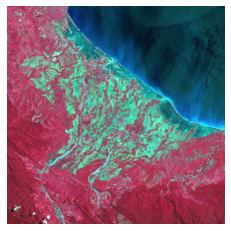

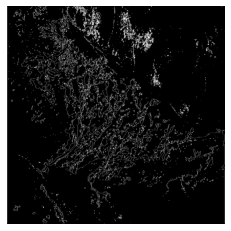

In [2]:
def FiltreLaplacien(InputImage):

    # Construction du masque de Laplacien
    masque_laplacien = np.zeros((3,3))
    masque_laplacien[:]=-1
    masque_laplacien[1,1]=8
    
    
    def init(n,m):
        return np.zeros((n, m))
    
    
    img = mpimg.imread(InputImage)
    n,m,c=img.shape
    
    img_interpo = img_lapla = init(n+2,m+2) 

    # fonction du filtre Laplacien
    
    i=1
    while i < n-1 :
        j=1
        while j < m-1 :
            img_lapla[i][j] = (img[i-1:i+2,j-1:j+2]*masque_laplacien).sum()
            j+=1
        i+=1
    
    img_lapla[img_lapla>=0] = 0
    img_lapla[img_lapla<0] = 1
    
    #Image de polarité
    
    x=img_lapla.shape[0]
    y=img_lapla.shape[1]
    for i in range(0,x-1):
        for j in range(0,y-1):
            if (img_lapla[i][j] == img_lapla[i][j+1]):
                img_interpo[i][j]=0
            else:
                img_interpo[i][j]=1
        
    
    return img_interpo


#laplacian filter matrix
lpf=np.array([[1, 1, 1], [1, 1, 1],[1, 1, 1]]) 
lpf=(-1)*lpf
lpf[1][1]=8
print(lpf)
        


# ouverture du fichier image
ImageFile = 'imsat TP3.jpg'#'split.jpg'#'test.jpg'
imgOG = mpimg.imread(ImageFile)


# affichage de l'image
plt.imshow(imgOG)
plt.axis('off')
plt.show()

 

img=FiltreLaplacien(ImageFile)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.show()

##### b-Sobel
Le détecteur de bord Sobel est une méthode basée sur le gradient. Il fonctionne avec des dérivés de premier ordre. Il calcule les premiers dérivés de l’image séparément pour les axes X et Y. Les dérivés ne sont que des approximations (car les images ne sont pas continues). Pour les rapprocher, les noyaux suivants sont utilisés pour la convolution :

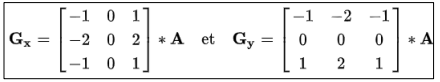

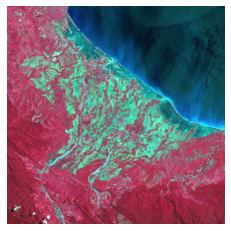

1


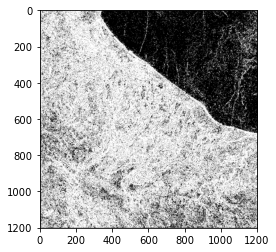

In [3]:
### gradient sobel

def FiltreGradient(img,hx,hy,se):#img input image
    #k nb des lines ou colone symetrique pour chaque filtre moyenne de taille impair
    #hx est un filtre vertical (comme celle de sobel)
    #hy est un filtre horizontal (comme celle de sobel)
    #se seuil
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    
    se=se
    
    #deduction de k (nb des 2 dans la taille du filtre)
    sizex,sizey=img.shape
    vx,vy=hx.shape
    k=int((vx-1)/2)
    print(k)
       
    
    
    #imag final
    ir=np.zeros([sizex, sizey])

    
    #amplitude image
    t=np.zeros([sizex, sizey])
    #direction du gradient image
    d=np.zeros([sizex, sizey])
    
    #gradient x
    gx=np.zeros([sizex, sizey])
    #gradient y
    gy=np.zeros([sizex, sizey])
    
    #gradient total
    g=np.zeros([sizex, sizey])
    
    i=0
    j=0
    
    c=0
    for c in range(3):
        x=0
        while(x<=(sizex-k-1)):##aproche avec effet de contour
            y=k
            
            while(y<=(sizey-k-1)):
                gx[x,y]=0
                gy[x,y]=0
                i=0
                ii=k
                #DEBUT PARCOURS VOISIN

                while(ii>=(-1)*k):##aproche avec effet de contour
                    j=0
                    jj=(-1)*k
                    while(jj<=k):
                        gx[x,y]=gx[x,y]+img[int(x+ii),int(y+jj)]*hx[i,j]
                        gy[x,y]=gy[x,y]+img[int(x+ii),int(y+jj)]*hy[i,j]
                        #print(x,y,ii,jj)
                        jj=jj+1
                        j=j+1
                    ii=ii-1
                    i=i+1
                #FIN PARCOURS VOISIN

                g[x,y]=np.sqrt(gx[x,y]**2+gy[x,y]**2)
            
                #print(s)
                if(g[x,y]>=se):
                    ir[int(x),int(y)]=1
                else:
                    ir[int(x),int(y)]=0
                        
                #print(x,y,s,ir[int(x),int(y)])
                y=y+1
            x=x+1
   
    
    
    mpimg.imsave("test-GRAD-after.jpg",ir);  #if not work use "gray");
    return gx,gy,ir        


#sobel

hx=np.array([[1, 0,-1],
             [2, 0,-2],
             [1, 0,-1]]) 

hy=np.array([[ 1, 2, 1],
             [ 0, 0, 0],
             [-1,-2,-1]]) 
        


# ouverture du fichier image
ImageFile = 'imsat TP3.jpg' #'split.jpg'
img = mpimg.imread(ImageFile)


# affichage de l'image
plt.imshow(img)
plt.axis('off')
plt.show()

    
gx,gy,img=FiltreGradient(img[:,:,0],hx,hy,35)#50 pour split)

plt.imshow(img,cmap='gray')
plt.show()


### 2- Fonctions pour calculer l'amplitude du gradient et la direction du gradient:

Le noyau de gauche se rapproche de la dérivée le long de l’axe X. Celui de droite est pour l’axe Y. À l’aide de ces renseignements, on calculer  calculer  l'amplitude du gradient et la direction du gradient: :

Magnitude or "strength" of the edge:   

Approximate strength: 

The orientation of the edge: 
1

C:\Users\pasus\AppData\Local\Temp/ipykernel_15636/2701539847.py:3: RuntimeWarning: divide by zero encountered in true_divide
  d=np.arctan(gy/gx)#direction du gradiant
C:\Users\pasus\AppData\Local\Temp/ipykernel_15636/2701539847.py:3: RuntimeWarning: invalid value encountered in true_divide
  d=np.arctan(gy/gx)#direction du gradiant


amplitude


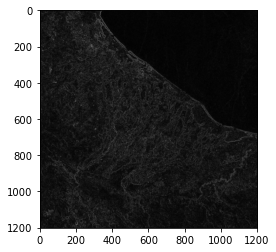

direction


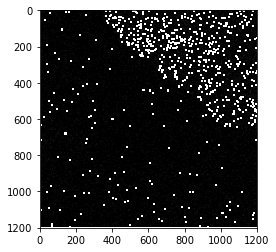

In [4]:
def DirectionETamplitude(gx,gy):
    a=np.sqrt(gx**2+gy**2)#amplitude
    d=np.arctan(gy/gx)#direction du gradiant
    d=d**180/np.pi #conversion vers degre (en int)
    return a,d
                
    
a,d=DirectionETamplitude(gx,gy)
print('amplitude')
plt.imshow(a,cmap='gray')
plt.show()
print('direction')
plt.imshow(d,cmap='gray')
plt.show()

### 3)Comparaisson des deux filtres
- le sobel est beaucoup mieux que laplacien a cause de la sensibilité au bruit de laplacien.

- Sobel: Contour epais. si on applique le filtre Sobel sur une image bruité le resultat sera bon et donc on conclue que le filtre Sobel n’est pas sensible au bruits.
- Laplacien: Contour discontinue. si on applique le filtre Laplacien sur une image bruité le resultat sera trés mauvais et donc on conclue que le filtre Laplacien est sensible au bruits.

Donc: On remarque un changement du type de contour (epais-discontinue).le filtre Laplacien est
sensible au bruits alors que le filtre Sobel n’est sensible au bruits. Le filtre
Laplacien est legérement meilleur que le filtre Sobel a cause de la polarité.


<CENTER><H2> Etape 2 : Segmentation

####  Seuillage - Histogramme :
Le seuillage a pour objectif de segmenter une image en plusieurs classes en n'utilisant que 
l'histogramme. On suppose donc que l'information associée à l'image permet à elle seule la 
segmentation, i.e. qu'une classe est caractérisée par sa distribution de niveaux de gris. A chaque pic 
de l'histogramme est associée une classe. 
Il existe de très nombreuses méthodes de seuillage d'un histogramme. La plupart de ces méthodes 
s'appliquent correctement si l'histogramme contient réellement des pics séparés. De plus, ces 
méthodes ont très souvent été développées pour traiter le cas particulier de la segmentation en deux 
classes (i.e. passage à une image binaire) et leur généralité face aux cas multi-classes n'est que très 
rarement garantie. 

In [5]:
def ReadAffiche(ImageFile):###fonction de lecture d'image 
    try:
            img = mpimg.imread("imsat TP3.jpg") #ImageFile est un chaine de caracteres d'image d'entrée avec  
                                            #point suivi de son extension et eventuellement with avec le repertoire
                                            ##img est un 
                                            ##matrice 3d (ne veut pas dire modele 3d) mais 
                                            ##contient successivement
                                            #dans la 1er dimension:coordonné x du pixel
                                            #dans le 2eme dimension:coordonné y du pixel
                                            #dans le 3eme dimension:niveau couleur du pixel
    
    except IOError: ##le cas si fichier a lire est inexistant
        print('ERREUR ,l\'image:' + ImageFile+'NON trouvé')
        sys.exit(1)
    
    # affichge du titre d'image
    print(ImageFile+":")
    
    # affichage de l'image
    plt.imshow(img)
    plt.show()
    return img##retour d'image lue en tant que matrice au 3axes (pas en tant que modele 3d) qui contient successivement
                #dans la 1er dimension:coordonné x du pixel
                #dans le 2eme dimension:coordonné y du pixel
                #dans le 3eme dimension:niveau couleur du pixel

In [6]:
def Seuillage(img): #tableau d'occurence des intesités du couleur
                    #img est une matrice image d'entré
                    #s=seuil de couleur en instensite rgb [0,255]    
    
    
    
    #fonction pour dessiner l'histogramme------------------------------------------------------------------------------------
    
    def hisPlot(occ,clr):  #clr est le stirng de couleur peut etre soit 'red",'green','blue'
        plt.rcParams["figure.figsize"] = [10,5] #change le taille du figure par format d'image (proportions)
                                                 #(la taille d'image qui englobe 
                                                 #tous les element tel que:
                                                 #le plot,les axe mais pas la legende)
                                                 ## pas seulment la courbe au sens du 
                                                 #la multiplication du fonction mathematiquement par un scalaire
                                                 #si egale [15,10] on aura hd-like representaion

        index=np.arange(256) ###un tablau 1d pour les valeur possible du niveau de couleur
                                #temporaire utilisé pour racourcir un peu le code

        plt.plot(index,occ[index],color=clr, linewidth=0.9) ###mise en scene du courbe occR (nombre 
                                                                ##d'occourence du niveau du couleur 
                                                                ##rouge) en fonction d'index et 
                                                                ##epaisseur 0.9 (defualt est 1) (j'ai un 
                                                                ##peu raccouci pour
                                                                ##une meilleur precision)


        plt.xlabel('les intensité du couleur')
        plt.ylabel('les occurence des instensite')
        plt.show()

    #--------------------------------------------------------------------------------------------------------------------------

    largeur,hauteur=img.shape                        #attribution des variable avec des valeur de l'image d'entrée 

    occ=np.zeros(256)                                #occR = occurence de niveau de rouge

    occPt=[[] for i in range(256)]                   #occpt est l'ensemble des points repartie en fonction
                                                     #les intensite de colueur a partir d'un histograme (equalize ou non
        
        
    ##########CREATION d'axe d'occurence de niveau de couleur
#print(clr) pour le debogage

    ###parcour des pixel par pixel par 2 boucle imbrique (premier en largeur et 2eme en hauteur)
    x=0   #initialison coordonné x
    while(x<largeur): #condition d'arret du coordonné x pour eviter l'overflow 

        y=0 #initialison coordonné y
        while(y<hauteur):#condition d'arret du coordonné y pour eviter l'overflow
            
            occ[int(img[x,y])]=occ[int(img[x,y])]+1 #incrementation d'occurence au un niveau de couleur ROUGE donné au 
                                                    #occR[niveau de couleur deja en entier]
                
            occPt[int(img[x,y])].append([x,y]) 
            y=y+1
        x=x+1    



    # DETECTION DE minimas ----------------------------------------------------------------------------------------------

    minimas=[]

    #cas intesité=1
    i=0
    if(occ[i] <occ[i+1]):
            minimas.append(i)
            
    #cas intesnité entre 2 et 255 

    for i in range(1,254):
        if(occ[i-1]>occ[i] and occ[i] <occ[i+1]):
            minimas.append(i)

    #cas intensite =256
    i=255
    if(occ[i-1]>occ[i]):
        minimas.append(i)

    print("minimas",minimas)

    #---------------------------------------------------------------------------------------------------------------------

    # AFFICHAGE D'HISTOGRAMME
    hisPlot(occ,'black')
    

    # classer intesnistes en sous images -------------------------------------------------------------------------------
    
    classes=[]
    for cl in range (0,len(minimas)-1-1 ):
        classes.append( (minimas[cl],minimas[cl+1]) )

    #print(classes)

    segments=[]

    for k in range(len(classes)-1):
        icurrent,inext=classes[k]
        sgmt=np.zeros((img.shape))
        #############detect les 2 point extremum pour rogner le segment courant

        
        for i in range(icurrent,inext):
            for j in range(0,len(occPt[i])):     
                x,y=occPt[i][j]       
                sgmt[x,y]=i

        segments.append(sgmt)
    return segments


split.jpg:


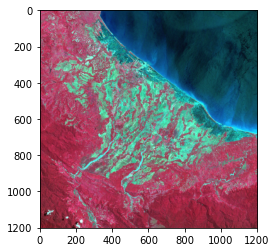

minimas [1, 34, 42, 48, 50, 66, 69, 84, 90, 95, 97, 100, 108, 114, 125, 149, 154, 160, 165, 167, 233, 240, 242, 247, 251]


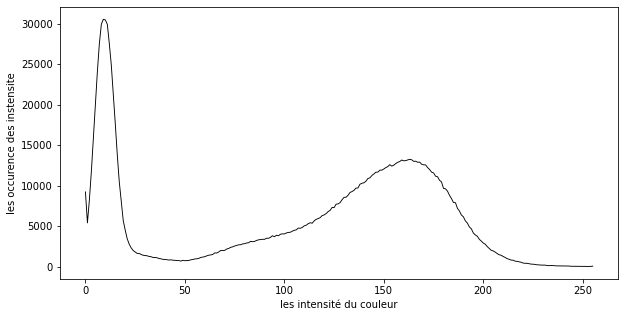

minimas [1, 5, 10, 58, 61, 69, 86, 100, 105, 110, 114, 116, 128, 136, 141, 143, 145, 147, 149, 152, 154, 156, 158, 162, 165, 169, 173, 175, 178, 180, 184, 187, 190, 193, 195, 200, 202, 205, 215, 222, 224, 228, 232, 236, 239, 242, 244, 247]


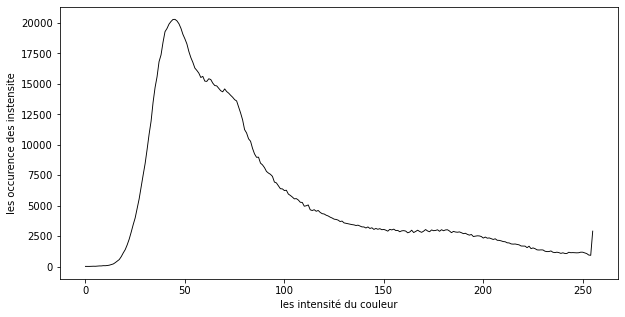

minimas [0, 2, 6, 10, 12, 14, 22, 66, 74, 76, 79, 82, 90, 92, 95, 97, 100, 102, 107, 112, 117, 119, 121, 127, 142, 146, 149, 152, 155, 157, 164, 167, 186, 188, 190, 200, 203, 212, 221, 223, 229, 231, 237, 240, 245, 247]


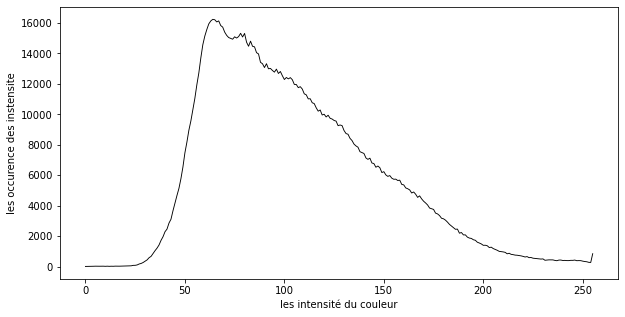

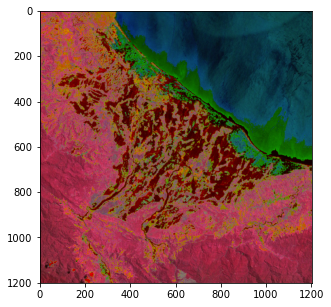

In [7]:
ImageFile = 'split.jpg'#'mini.jpg'
imgILL=ReadAffiche(ImageFile)

#imgILL=(imgILL[:,:,0] +imgILL[:,:,1] + imgILL[:,:,2])/3 ###moyenne des intensités RGB
#print(imgILL)
#plt.imshow(imgILL[:,:,0]/255.0)
#plt.show()


R=Seuillage(imgILL[:,:,0])
G=Seuillage(imgILL[:,:,1])
B=Seuillage(imgILL[:,:,2])
#print(SimgILL)

ir=np.zeros((imgILL.shape[0],imgILL.shape[1],3))


####colorier les classe obtenu par niveau
finalclasses=[]
chk=np.zeros((imgILL.shape[0],imgILL.shape[1],3))#img de verification
chk=chk.astype(np.uint8)
for k in range (len(R)):
    final=np.zeros((imgILL.shape[0],imgILL.shape[1],3))#classe en couleur
    final[:,:,0]=R[k][:,:]
    final[:,:,1]=G[k][:,:]
    final[:,:,2]=B[k][:,:]
    finalclasses.append(final.astype(np.uint8))
    chk=chk+final
    #pour verifier il suffit de fair la somation de tous les classes coloriés car les classes sont distinctes (n'ont pas)
    #generalment de points communs (dans ce contexte de cet algorithme sont des point colorés)

plt.imshow(chk/255)
plt.show()       

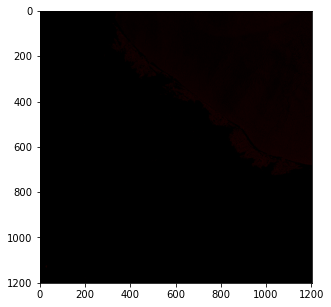

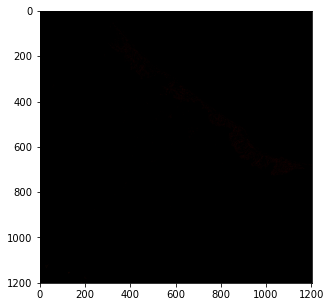

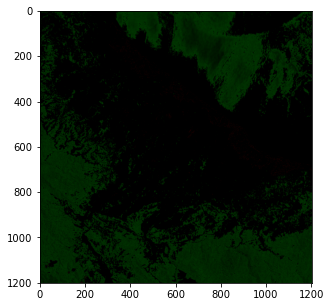

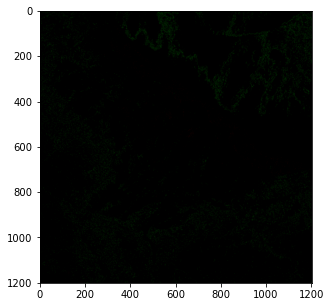

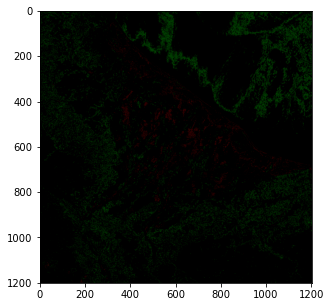

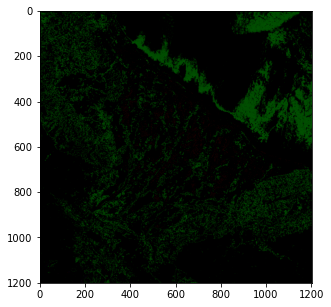

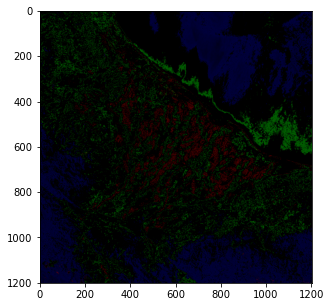

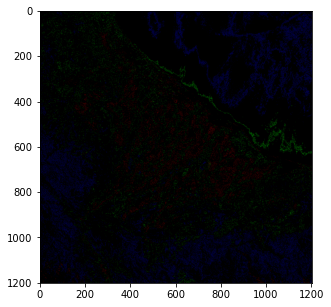

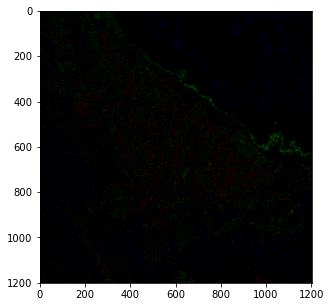

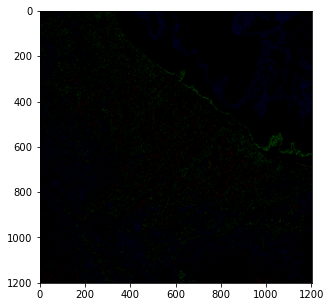

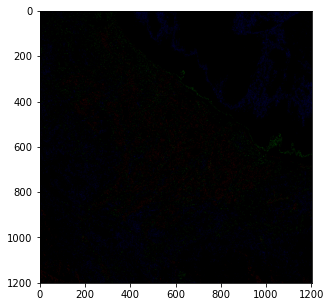

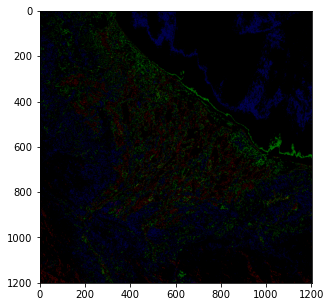

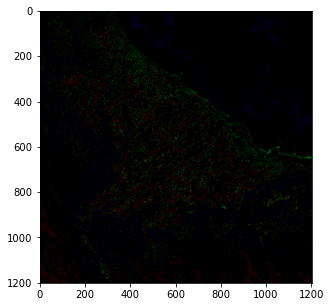

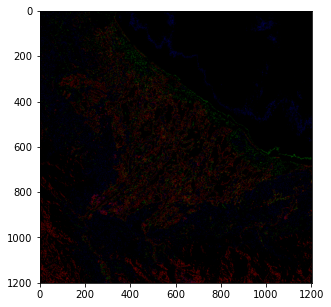

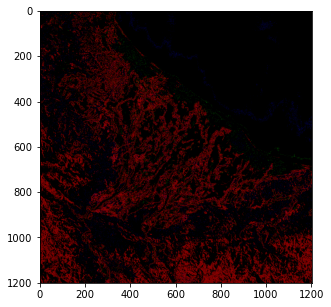

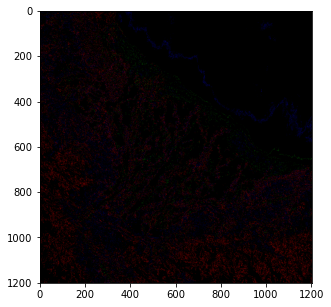

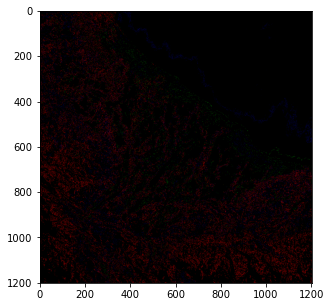

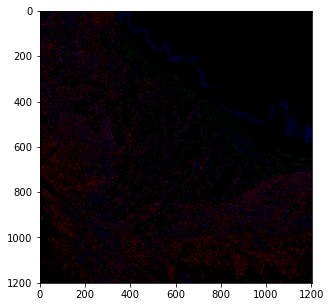

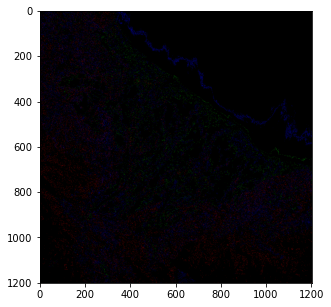

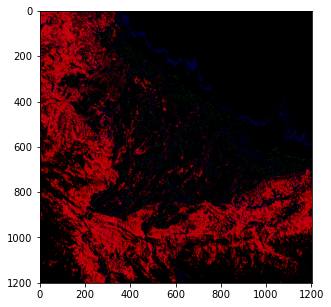

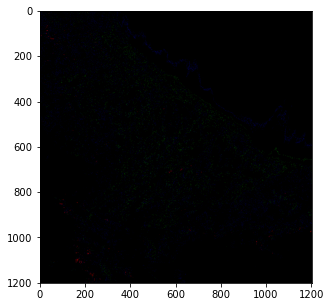

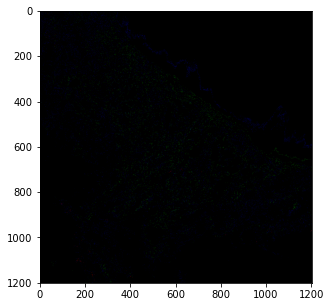

In [8]:
# affichage des classses
for i in range (len(finalclasses)):
    plt.imshow(finalclasses[i]/255)
    plt.show()       

#### 2)  On a choisi la 1ére méthode: entres les minimas

cette approche consite: 
pour chaque canal (Histogramme) :

    #debut de la boucle

- 1) a detecter tous les minimas des histogrammes 

- 2) les sueils sont ces minimas detectes 

- 3) on fabrique tous les couple  de (minima actuel ,minima suivant) possibles appéle classes (suelment 2 minimas succesives)
- 4) puis on fait un ensemble de distribution des pixels d'image selon les intesnites (on utilise le look up table             d'equalization d'hisotgrame) 

- 5) on fabrique des classes K (en forme d'images partiels (une classe k= une image partiel) ) par la division  l'ensemble D par C (les couples de minimas) cad chaque 2 minimas succesives on prend les pixels qui sont situés entres ces 2 minimas ,on mets ces pixels dans une classe "cl" avec leur niveu de gris d'origine (pour chaque cl dans K)

        #fin boucle
     
- 6) on assembles pour chaque classes les 3 niveau de couleur pour avoir la meme classe en rgb dans une image final f (on        repete pour tout les classes)
    
- 7) affichage du resultat

OPTIONAL (verififcation de resultats): pour verifier les classe ont été correctement formés on fait la somation de tous les classes "K" dans un seul image "CHK"

#### 3) limites :

1- sensible au bruit d'histogrames (les series de leger changement de points d'hauteur de pic autour de 0-255 dans l'intensité' dans les histograme entre les pic signifiant(cell avec grand changment de points) )

2- un peu lent a cause de la premiere cause

Malgré le développement de techniques robustes visant à faciliter la détection des vallées, cette 
méthode, bien que simple, est très peu appliquée car les histogrammes traités sont le plus souvent 
bruités et unimodaux. 

### K-means

In [14]:
def kmeans(xi,K):#xi =input set of point aka input img
                    #k=nb of classes
    
    m,n=xi.shape #on fait ça pour que apres la fin d'execution de kmeans pour
                    #convertire 1d to 2d 
    #convert imag from 2d to 1d par fonction flatten()
    #xi=xi.flatten()
    
    t=0 #iteration
    
    #---------------------- Initialisation : On initialise les centres des classes ------------------------------------

    
    z=np.zeros((m,n,K))#output found classes
    
   
    centres=[]
    tempcentres=[] #Var temporaire pour comparer les anciens centre avec les les centres actuels
    
    #initialiser K centroide aleatoire
    for k in range(K):
        x=int(np.random.randint(0,m-1))
        y=int(np.random.randint(0,n-1))
        centres.append(((x,y),xi[x,y]))
        tempcentres.append(((0,0),xi[0,0]))
        
    print('centres actuels')
    print( centres) #les centre actuels
    
    print('centres temporaire')
    print(tempcentres)
    
    
    
    plt.imshow(z[:,:,0], cmap='gray')
    #plt.show()

    plt.imshow(z[:,:,1], cmap='gray')
    #plt.show()

    plt.imshow(z[:,:,2], cmap='gray')
    #plt.show()
    
    
    print(xi)
    #for i in range(K):
    #    centres[i]=np.abs( int(len(xi)-(i+2)**2 ) )# get two random indexes)
        #centres[i]=list(xi).index(np.random.rand(len(xi)-1))
        #centres[i]=np.where(xi==np.random.rand(len(int(xi) -1 )  ) ) 
    #est=np.random(6)
    #nb iteration max
    #print(centres)
    
    maxlter=10 #nombre d'iteration max
    
    #fixer un seuil de classe pour le test de convergence 
    seuil=1/10**6 #10**6 #biggest val possible
    

    torsion=0
    
    z=np.zeros((m,n,K)) #output found classes

    
    converge=0
    
    while(t<maxlter and converge is not 1):
        
        print(t,"eme iteraiton")
        
        #--------------------------------------------- 1.Etape affectation--------------------------------------
        
        DIST=[] #distance (centre et point (i,j) d'image d'entrée)
        for i in range(0,m):#par pixel d'image d'entrée
            DIST=[]
            for j in range(0,n ):#par pixel d'image d'entrée
                #print(i,j,k)
                
                DIST=[]
                for k in range(0,K): #par de centres
                    #print(xi[i,j]**2)
                    #print(centres[k][1])
                    DIST.append( np.sqrt( np.abs(xi[i,j]**2-centres[k][1]**2) ) )
                    #print('k is ',k)
                #print(DIST)    
                
                
                arg=DIST.index( min(DIST) )# affectation, Chaque donnée est assignée à la classe du centre
                                          # dont elle est la plus proche
                
                z[i,j,arg]=xi[i,j] #marquage du pixel de classe en blanc
                
                
                
                #print('j is',j)
            #print('i is',i)
    
        #------------------------------- 2.recalcule des centres de classes ------------------------------------------
  
        for k in range(K):
            sx=0 #nouvau centre au x
            sy=0 #nouvau centre au y
            d=0 #denominant pour les moyennes
            for i in range(m-1):
                for j in range(n-1):
                    if(z[i,j,k]==1):
                        sx=sx+i #equivaut au #sx=sx+1*i -> #sx=sx+z[i,j,k]*i cela permet
                                    #d'alleger l'algorithme
                        sy=sy+j #equivaut au #sy=sy+1*j -> #sy=sy+z[i,j,k]*j
                                    #pour la meme but
                        d=d+1
            
            #affectation de moyenne
            
            if(d==0):
                sx=0
                sy=0
            else:
                sx=int(sx/d)
                sy=int(sy/d)
            
            tempcentres[k]=(sx,sy,img[sx,sy])
        
            
            
        #comparaison des centres actuel au ancien centres 
        
        torsion=0
        for k in range(K):
            if(tempcentres[k][0]==centres[k][0]):
                torsion=torsion+1
            if(tempcentres[k][1]==centres[k][1]):
                torsion=torsion+1
        
        #y=np.zeros((xi.shape))
        
        
        #---------------marquage de nouveau centres
        
        print("new centres")
        y=img.copy()
        y[sx,sy]=0
        plt.imshow(y, cmap='gray')
        plt.show()
        
        #--------------affectation de nouveau centres
        
        for k in range(K):
            centres[k][0]==tempcentres[k][0]
            centres[k][1]==tempcentres[k][1]
        
        
        print(centres)
        
        
        #affichage de classes par iteration en forme de image
        
        
        print("classement")
        
        print("classe 1")
        plt.imshow(z[:,:,0], cmap='gray')
        plt.show()

        
        print("classe 2")
        plt.imshow(z[:,:,1], cmap='gray')
        plt.show()

        
        print("classe 3")
        plt.imshow(z[:,:,2], cmap='gray')
        plt.show()
        
        #verification des distance entre les anciens centres et les nouveau centres
        
        
        print('iter',t)
        print('WORK IN PROGRESS')
        
        if(torsion==0):#or t>=maxlter ):
            t=maxlter+2
            converge=1
            print("FINI")
             #return z,centres

            #converge=1
        
        
        
        t=t+1
     
    #print(z)
    #z=z.reshape(m,n)
    return z,centres

<>:67: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:67: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\pasus\AppData\Local\Temp/ipykernel_15636/2862997286.py:67: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  while(t<maxlter and converge is not 1):


imsat TP3.jpg:


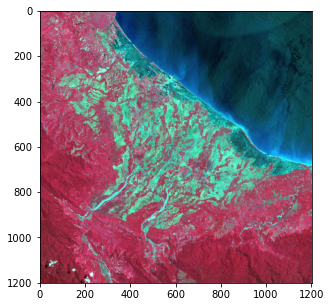

centres actuels
[((574, 29), 180), ((277, 1191), 8), ((939, 250), 204), ((882, 728), 181), ((736, 91), 158), ((734, 354), 133), ((512, 608), 141), ((1131, 1064), 154), ((423, 660), 71), ((611, 639), 144), ((563, 907), 28), ((771, 342), 75), ((820, 507), 77), ((939, 896), 161), ((261, 7), 167), ((438, 190), 119), ((905, 352), 134), ((698, 288), 176), ((521, 616), 112), ((892, 712), 185), ((396, 494), 130), ((642, 464), 107), ((1178, 1166), 109), ((1148, 228), 164), ((328, 831), 7), ((862, 651), 118), ((650, 17), 155), ((1117, 1038), 157), ((742, 1134), 152), ((619, 1095), 14)]
centres temporaire
[((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0)

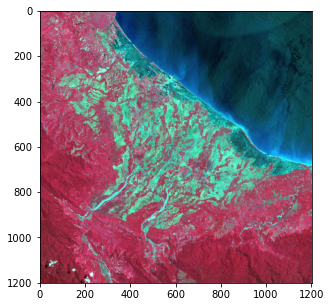

[((574, 29), 180), ((277, 1191), 8), ((939, 250), 204), ((882, 728), 181), ((736, 91), 158), ((734, 354), 133), ((512, 608), 141), ((1131, 1064), 154), ((423, 660), 71), ((611, 639), 144), ((563, 907), 28), ((771, 342), 75), ((820, 507), 77), ((939, 896), 161), ((261, 7), 167), ((438, 190), 119), ((905, 352), 134), ((698, 288), 176), ((521, 616), 112), ((892, 712), 185), ((396, 494), 130), ((642, 464), 107), ((1178, 1166), 109), ((1148, 228), 164), ((328, 831), 7), ((862, 651), 118), ((650, 17), 155), ((1117, 1038), 157), ((742, 1134), 152), ((619, 1095), 14)]
classement
classe 1


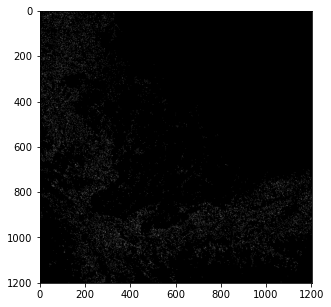

classe 2


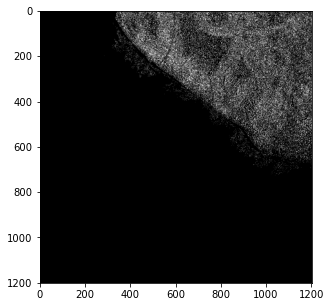

classe 3


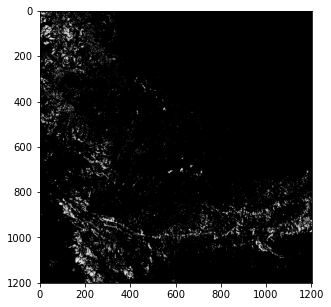

iter 0
WORK IN PROGRESS
FINI


In [15]:
ImageFile ='imsat TP3.jpg'
img=ReadAffiche(ImageFile)
cls,ctr=kmeans(img[:,:,0],30)#*0.25+img[:,:,1]*0.5+img[:,:,2]*0.25)/255,30)
#print(cls)

K-means clustering se distingue de Hierarchical puisqu’il crée des centroïdes aléatoires K dispersés dans les données. L’algorithme ressemble un peu à…

- Initialiser les centroïdes aléatoires K.
Choisir des points de données aléatoires K et en faire nos points de départ.
Sinon, on choisit des valeurs aléatoires K pour chaque variable.
- Pour chaque point de données, on regardee quel centroïde est le plus proche.
En utilisant une sorte de mesure comme la distance euclidienne.
On Assigne le point de données au centroïde le plus proche.
- Pour chaque centroïde, On déplace le centroïde à la moyenne des points attribués à ce centroïde.
On Répéte les trois dernières étapes jusqu’à ce que l’affectation centroïde ne change plus.
On dit que l’algorithme a « convergé » une fois qu’il n’y a plus de changements.
La convergence peut être considérée comme atteinte si la valeur relative au niveau de la distorsion devient inférieure à un seuil petit préfixé ou si un nombre
maximum d’itérations préfixé a été atteint.

- Et en fin on affiche les classes par iteration en forme de image
